In [1]:
#Setting up environment
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../")

DATA_FILEPATH = "../final/data/"
VOCAB_PATH = DATA_FILEPATH + "imdb.vocab"
TEST_PATH = DATA_FILEPATH + "test"
TRAIN_PATH = DATA_FILEPATH + "train"

In [2]:
#Load and split data
vocab = np.genfromtxt(VOCAB_PATH, delimiter=None, dtype=str)
bow_tr = np.genfromtxt(TRAIN_PATH+"/labeledBow.feat", delimiter='\n', dtype=str)
bow_te = np.genfromtxt(TEST_PATH+"/labeledBow.feat", delimiter='\n', dtype=str)

bow_tr_pos, bow_tr_neg = bow_tr[:12500], bow_tr[12500:]
bow_te_pos, bow_te_neg = bow_te[:12500], bow_te[12500:]

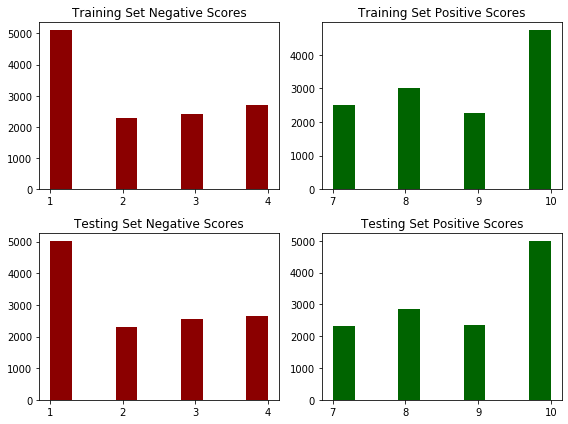

In [17]:
#Plotting score distributions
scores_pos_tr = [int(s.split(' ', 1)[0]) for s in bow_tr_pos]
scores_neg_tr = [int(s.split(' ', 1)[0]) for s in bow_tr_neg]
scores_pos_te = [int(s.split(' ', 1)[0]) for s in bow_te_pos]
scores_neg_te = [int(s.split(' ', 1)[0]) for s in bow_te_neg]

fig,axs = plt.subplots(2,2, figsize=(8,6))
axs[0,1].hist(scores_pos_tr, color = 'darkgreen')
axs[0,1].set_xticks([7,8,9,10])
axs[0,1].set_title("Training Set Positive Scores")

axs[0,0].hist(scores_neg_tr, color='darkred')
axs[0,0].set_xticks([1,2,3,4])
axs[0,0].set_title("Training Set Negative Scores")


axs[1,1].hist(scores_pos_te, color = 'darkgreen')
axs[1,1].set_xticks([7,8,9,10])
axs[1,1].set_title("Testing Set Positive Scores")

axs[1,0].hist(scores_neg_te, color='darkred')
axs[1,0].set_xticks([1,2,3,4])
axs[1,0].set_title("Testing Set Negative Scores")

fig.tight_layout()
fig.savefig("../final/figures/score_distribution.png")

In [67]:
#Plot most common words
word_count_pos_tr = np.zeros(len(vocab))
word_count_neg_tr = np.zeros(len(vocab))

for instance in bow_tr_pos:
    str_split = instance.split(" ")[1:] #First substring is score, don't need
    for s in str_split:
        index, count = s.split(":")
        word_count_pos_tr[int(index)] += int(count)
        
for instance in bow_tr_neg:
    str_split = instance.split(" ")[1:] #First substring is score, don't need
    for s in str_split:
        index, count = s.split(":")
        word_count_neg_tr[int(index)] += int(count)

['great' 'very' 'her' 'he' 'with' 'best' 'love' 'also' 'well' 'film'
 'life' 'has' 'story' 'by' 'who' 'she' 'excellent' 'will' 'him' 'both'
 'wonderful' 'still' 'an' 'from' 'young' 'world' 'years' 'its' 'beautiful'
 'performance' 'most' 'always']
['bad' 'i' 'was' 'no' 'just' 'there' 'even' 'they' 'have' 'or' 'to' 'if'
 'worst' 'like' 'so' 'be' 'not' 'that' "don't" 'plot' 'nothing' 'any'
 'only' 'acting' 'why' 'would' 'then' 'could' 'make' 'awful' 'do'
 'minutes' 'waste' 'were' 'thing' 'stupid' 'terrible']


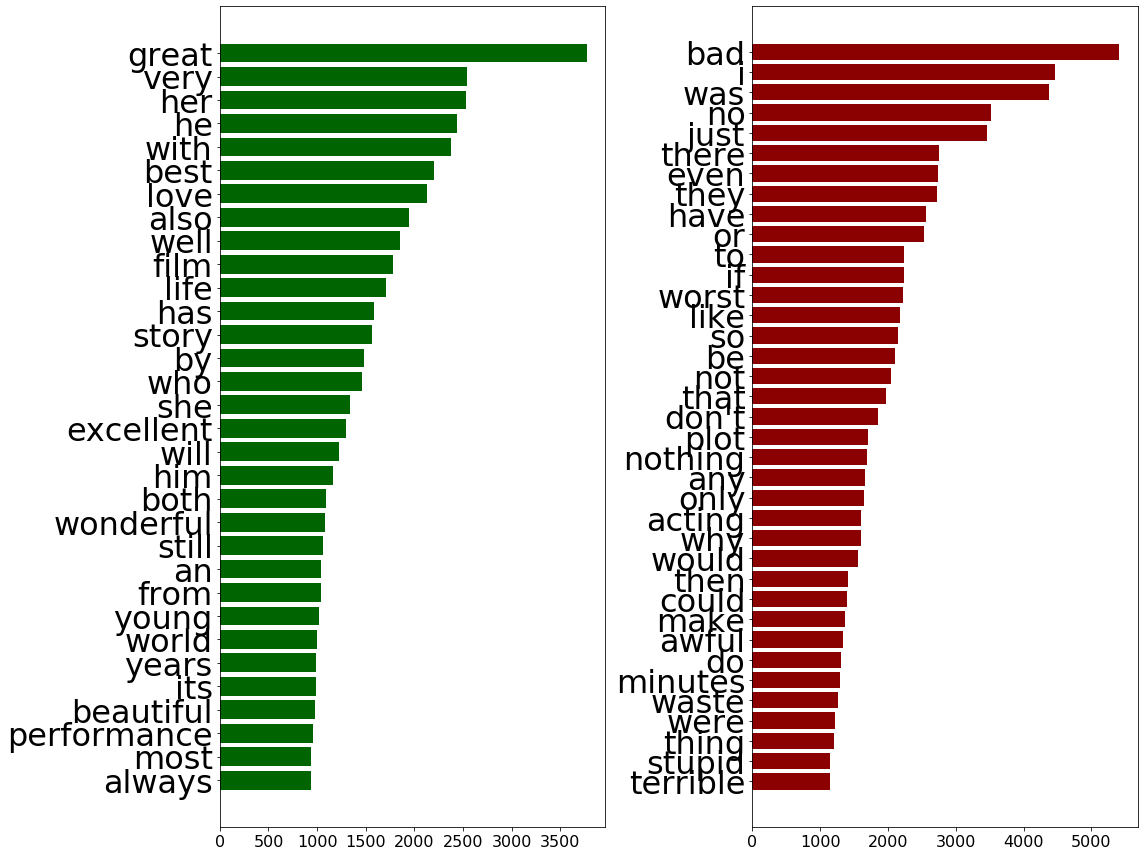

In [70]:
k = 40
n = 8
m = 3

diff_pos = (word_count_pos_tr - word_count_neg_tr)
ind_p = np.argpartition(diff_pos, -k)[-k:]
ind_p = np.flip(ind_p[np.argsort(diff_pos[ind_p])])
print(vocab[ind_p][n:])

diff_neg = (word_count_neg_tr - word_count_pos_tr)
ind_n = np.argpartition(diff_neg, -k)[-k:]
ind_n = np.flip(ind_n[np.argsort(diff_neg[ind_n])])
print(vocab[ind_n][m:])

fig, axs = plt.subplots(1, 2, figsize=(16,12))
axs[0].barh(np.arange(len(diff_pos[ind_p][n:])), diff_pos[ind_p][n:], color='darkgreen')
axs[0].set_yticks(np.arange(len(diff_pos[ind_p][n:])))
axs[0].set_yticklabels(vocab[ind_p][n:], size = 32)
axs[0].invert_yaxis()
axs[0].tick_params(axis='x', labelsize=16)

axs[1].barh(np.arange(len(diff_neg[ind_n][m:])), diff_neg[ind_n][m:], color='darkred')
axs[1].set_yticks(np.arange(len(diff_neg[ind_n][m:])))
axs[1].set_yticklabels(vocab[ind_n][m:], size = 32)
axs[1].invert_yaxis()
axs[1].tick_params(axis='x', labelsize=16)


fig.tight_layout()
fig.savefig("../final/figures/word_diff.png")

In [57]:
#Here we do PCA
#First block is setting up data in the right format
from sklearn import decomposition

data_matrix = np.zeros((len(bow_tr) ,len(vocab)))
label_matrix = np.zeros(len(bow_tr))
label_matrix[12500:] = 1

for i,instance in enumerate(bow_tr):
    str_split = instance.split(" ")[1:] #First substring is score, don't need
    for s in str_split:
        index, count = s.split(":")
        data_matrix[i,int(index)] = int(count)

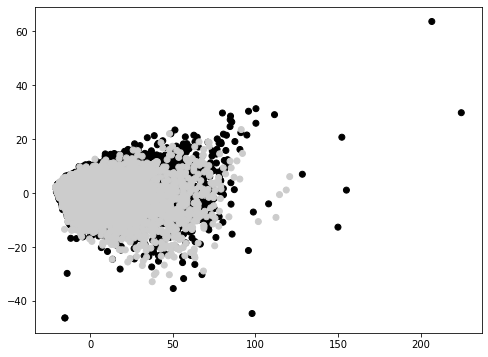

In [63]:
#Now do PCA and plot
pca = decomposition.PCA(n_components=2)
pca.fit(data_matrix)
X = pca.transform(data_matrix)

fig,ax = plt.subplots(figsize=(8,6))
ax.scatter(X[:,0], X[:,1], c=label_matrix, cmap=plt.cm.nipy_spectral)

/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


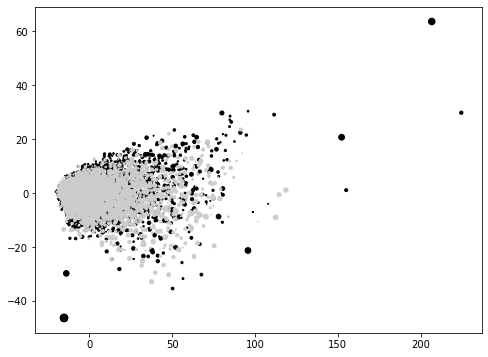

In [65]:
#Now do PCA and plot
pca = decomposition.PCA(n_components=3)
pca.fit(data_matrix)
X = pca.transform(data_matrix)

fig,ax = plt.subplots(figsize=(8,6))
ax.scatter(X[:,0], X[:,1], X[:,2], c=label_matrix, cmap=plt.cm.nipy_spectral)